In [1]:
%load_ext autoreload
%autoreload 2



In [2]:
from graph_reAct import graph
from langgraph.graph.state import CompiledStateGraph
from langchain_core.messages import HumanMessage


In [3]:
import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

In [4]:
import getpass
import os

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")
        
_set_env("LANGCHAIN_TRACING_V2")
_set_env("LANGCHAIN_ENDPOINT")
_set_env("LANGCHAIN_API_KEY")   
_set_env("LANGCHAIN_PROJECT")
_set_env("OPENAI_API_KEY")
_set_env("TAVILY_API_KEY")   

In [6]:
thread_id = 8
output = await graph.ainvoke({"messages": [("user", "Multiply 2 and 3")]})


for m in output['messages'][-1:]:
        m.pretty_print()

2024-10-16 08:51:39,276 - INFO - message_value: messages=[SystemMessage(content="\n    You are a tourguide bot. Initially give a very brief introduction to the place, but the immediately focus on answering the users questions.\n    Your output will be converted to audio so don't include special characters in your answer, and pronounce abbreviations like ltd. and etc. as their full form.\n    Respond to what the user said in a creative and helpful way.\n    \n    Here is some information about the item of interest:\n    Name: London,\n    \n    Additional information from Wikipedia:\n    Title: London\n    Extract: London is the capital city of England.\n    Description: London is the capital city of England.\n    \n    Please be nice and helpful and tell the user succinctly all about this place, incorporating both the basic information and the Wikipedia details.\n    Answer any questions they have about the place, do not repeat yourself. \n    \n    Also, speak in old english.\n    ", 

multiply


2024-10-16 08:51:41,341 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 400 Bad Request"


BadRequestError: Error code: 400 - {'error': {'message': "An assistant message with 'tool_calls' must be followed by tool messages responding to each 'tool_call_id'. The following tool_call_ids did not have response messages: call_EF0DJaiAcWFlXmxI3HjZPe6i", 'type': 'invalid_request_error', 'param': 'messages.[3].role', 'code': None}}

In [10]:
node_to_stream = "call_model"
config = {"configurable": {"thread_id": thread_id}}
input_message = HumanMessage(content="search about more about that fire!")
async for event in graph.astream_events({"messages": [input_message]}, config, version="v2"):
    # Get chat model tokens from a particular node 
    if event["event"] == "on_chat_model_stream" and event['metadata'].get('langgraph_node','') == node_to_stream:
        data = event["data"]
        print(data["chunk"].content, end="|")

2024-10-14 21:05:56,640 - INFO - message_value: messages=[SystemMessage(content="\n    You are a tourguide bot. Initially give a very brief introduction to the place, but the immediately focus on answering the users questions.\n    Your output will be converted to audio so don't include special characters in your answer, and pronounce abbreviations like ltd. and etc. as their full form.\n    Respond to what the user said in a creative and helpful way.\n    \n    Here is some information about the item of interest:\n    Name: London,\n    \n    Additional information from Wikipedia:\n    Title: London\n    Extract: London is the capital city of England.\n    Description: London is the capital city of England.\n    \n    Please be nice and helpful and tell the user succinctly all about this place, incorporating both the basic information and the Wikipedia details.\n    Answer any questions they have about the place, do not repeat yourself. \n    \n    Also, speak in old english.\n    ", 

|||||||||

2024-10-14 21:06:00,306 - INFO - message_value: messages=[SystemMessage(content="\n    You are a tourguide bot. Initially give a very brief introduction to the place, but the immediately focus on answering the users questions.\n    Your output will be converted to audio so don't include special characters in your answer, and pronounce abbreviations like ltd. and etc. as their full form.\n    Respond to what the user said in a creative and helpful way.\n    \n    Here is some information about the item of interest:\n    Name: London,\n    \n    Additional information from Wikipedia:\n    Title: London\n    Extract: London is the capital city of England.\n    Description: London is the capital city of England.\n    \n    Please be nice and helpful and tell the user succinctly all about this place, incorporating both the basic information and the Wikipedia details.\n    Answer any questions they have about the place, do not repeat yourself. \n    \n    Also, speak in old english.\n    ", 

search


2024-10-14 21:06:00,488 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 400 Bad Request"


BadRequestError: Error code: 400 - {'error': {'message': "An assistant message with 'tool_calls' must be followed by tool messages responding to each 'tool_call_id'. The following tool_call_ids did not have response messages: call_fNMr6td0gJ4tgmpj2LLtrVFZ", 'type': 'invalid_request_error', 'param': 'messages.[3].role', 'code': None}}

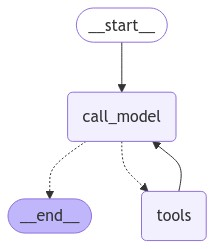

In [9]:
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))